# This is a comparison of PCA and t-SNE for visualizing high dimensional data. 

This code is retrieved from: https://www.linkedin.com/pulse/dimensionality-reduction-using-tsne-python-deepak-kumar.

The purpose of this notebook is to attain an idea of the properties and time constraints of PCA and t-SNE for
high dimensional data, later to be used for visualizing Neural Network transformations

In [ ]:
"""Converts MNIST data to TFRecords file format with Example protos."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import sys
## generating the training batches
import numpy as np
import scipy.io
from array import array
import meta
%pylab inline
from matplotlib.patches import Rectangle
import numpy as np
from PIL import *
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow.contrib.learn.python.learn.datasets import mnist

In [ ]:
data_sets = mnist.read_data_sets('./mnist',
                                   dtype=tf.uint8,
                                   reshape=False,
                                   validation_size=5000)

In [ ]:
print(data_sets.train.images.shape)
print(data_sets.train.labels.shape)

print(type(data_sets.train.images))
print(type(data_sets.train.labels))

In [ ]:
# perform dimensionality reduction using - PCA
X = data_sets.train.images.reshape(55000, 28*28)/255
y = data_sets.train.labels

print(X.shape, y.shape)


# plot the data

In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

rndperm = np.random.permutation(df.shape[0])


# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()



# PCA 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

from ggplot import *

chart = ggplot( df.loc[:3000,:], aes(x='pca-two', y='pca-one', color='label') ) \
        + geom_point(size=75,alpha=0.8) + ggtitle("First and Second Principal Components colored by digit")
chart

# Below is the t-SNE claerly perfoming a better task

In [ ]:
from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [29]:
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

print(X.shape)
print(y.shape)
print(digits.target.shape)

Automatically created module for IPython interactive environment
(1797, 64)
(1797,)
(1797,)


In [37]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
            #ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [34]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

Computing t-SNE embedding
shape of X is (1797, 64), y is (1797,)


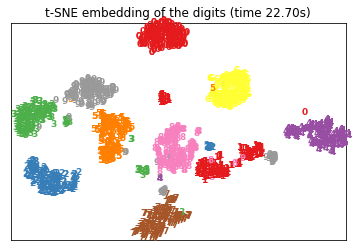

In [38]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
print('shape of X is {}, y is {}'.format(X.shape, y.shape))
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [40]:
from matplotlib import gridspec

gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

gs